
# 자동차 구매 가격 예측



# PROBLEM STATEMENT

다음과 같은 컬럼을 가지고 있는 데이터셋을 읽어서, 어떠한 고객이 있을때, 그 고객이 얼마정도의 차를 구매할 수 있을지를 예측하여, 그 사람에게 맞는 자동차를 보여주려 한다. 

- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth (순자산)

예측하고자 하는 값 : 
- Car Purchase Amount 

# STEP #0: 라이브러리 임포트 및 코랩 환경 설정

[구글 드라이브 파일 읽기 참고](https://vision-ai.tistory.com/entry/%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B8%8C%EC%9D%98-csv-%ED%8C%8C%EC%9D%BC-%EC%9D%BD%EA%B8%B0)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### csv 파일을 읽기 위해, 구글 드라이브 마운트 하시오

In [2]:
from google.colab import drive

ModuleNotFoundError: No module named 'google'

### working directory 를, 현재의 파일이 속한 폴더로 셋팅하시오.

# STEP #1: IMPORT DATASET

### Car_Purchasing_Data.csv 파일을 사용한다.  코랩의 경우 구글드라이브의 전체경로를 복사하여 파일 읽는다. 

### 인코딩은 다음처럼 한다. encoding='ISO-8859-1'

In [18]:
car_df = pd.read_csv('data/Car_Purchasing_Data.csv', encoding='ISO-8859-1' )

In [9]:
car_df


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


### 컬럼을 확인하고

### 기본 통계 데이터를 확인해 보자

In [12]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [10]:
car_df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


### 연봉이 가장 높은 사람은 누구인가

In [19]:
car_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [21]:
car_df.loc[ car_df['Annual Salary'] == car_df['Annual Salary'].max() , ]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
28,Gemma Hendrix,lobortis@non.co.uk,Denmark,1,46.124036,100000.0,17452.92179,188032.0778,58350.31809


### 나이가 가장 어린 고객은, 연봉이 얼마인가

In [24]:
car_df.loc[ car_df['Age'] == car_df['Age'].min() , ]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
444,Camden,Aliquam.adipiscing.lobortis@loremut.net,Congo (Brazzaville),1,20.0,70467.29492,100.0,494606.6334,28645.39425


In [79]:
car_df.loc[ car_df['Age'] == car_df['Age'].min() , 'Annual Salary' ]

444    70467.29492
Name: Annual Salary, dtype: float64

# STEP #2: VISUALIZE DATASET

### 상관관계를 분석하기 위해, pairplot 을 그려보자.

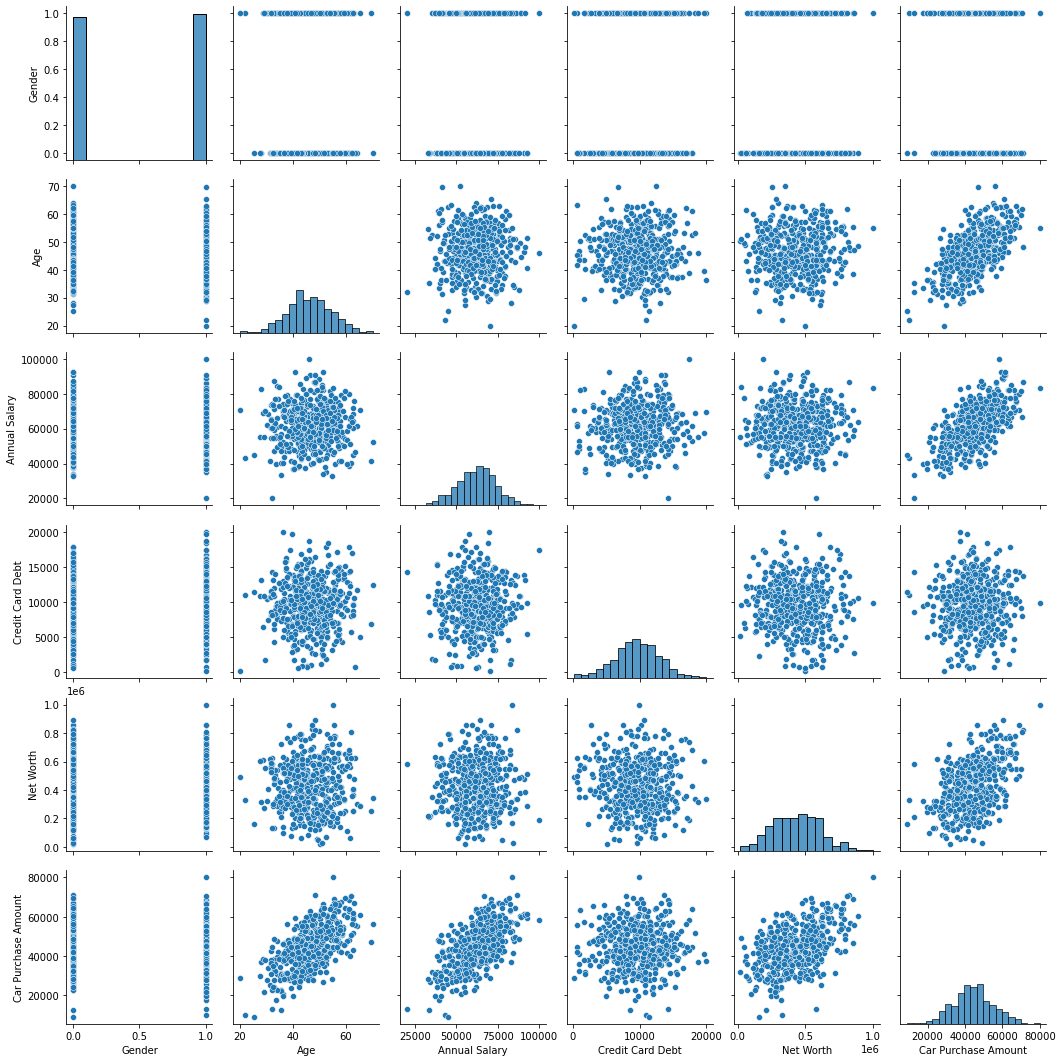

In [81]:
sns.pairplot(data= car_df)
plt.show()

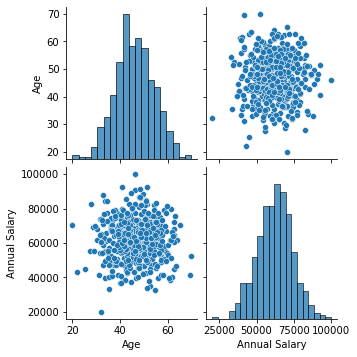

In [26]:
sns.pairplot(data= car_df, vars= ['Age' , 'Annual Salary'])
plt.show()

In [82]:
car_df.corr()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
Annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


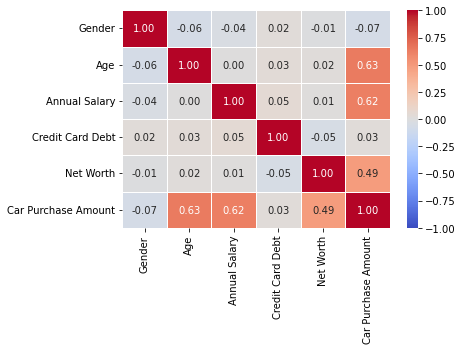

In [91]:
sns.heatmap(data= car_df.corr(), annot=True, fmt='.2f',
           vmin = -1, vmax = 1, cmap='coolwarm', linewidths=0.5)
plt.show()

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING




### NaN 값이 있으면, 이를 해결하시오.

In [27]:
car_df.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

### 학습을 위해 'Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount' 컬럼을 제외한 컬럼만, X로 만드시오.

In [29]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [92]:
# Country 컬럼을 왜 뺐는가?

car_df.shape

(500, 9)

In [95]:
car_df['Country'].nunique()

211

In [96]:
car_df['Country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', 'Macedonia',
       'Oman', 'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', 'Åland Islands',
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'S

In [98]:
car_df['Country'].value_counts()

Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
marlal                 1
Name: Country, Length: 211, dtype: int64

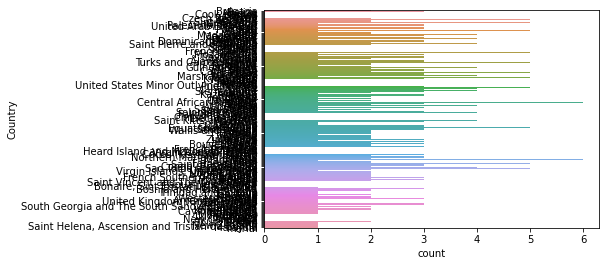

In [103]:
sns.countplot(data= car_df, y = 'Country')
plt.show()

# 유니크한 데이터가 너무 많아서 특성이 211개나 되서 이것으로 분류하기에 묶을만한 가치가 없다
# 자동차 구매 금액하고는 영향을 끼치지 않을것 같다

In [32]:
car_df.loc[ : , 'Gender' : 'Net Worth' ]

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [178]:
X = car_df.loc[ : , 'Gender' : 'Net Worth' ]

### y 값은 'Car Purchase Amount' 컬럼으로 셋팅하시오.

In [106]:
y = car_df.loc[ : , 'Car Purchase Amount' ]

In [35]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

### 피처 스케일링 하겠습니다. 정규화(normalization)를 사용합니다. MinMaxScaler 를 이용하시오.

In [179]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [180]:
from sklearn.preprocessing import MinMaxScaler

In [181]:
scaler = MinMaxScaler()

In [182]:
X = scaler.fit_transform(X)

In [183]:
X

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [46]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [48]:
X.shape

(500, 5)

In [49]:
y.shape

(500,)

In [53]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [58]:
y = np.array(y).reshape(500 , 1)

In [60]:
y

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601],
       [59045.51309],
       [42288.81046],
       [28700.0334 ],
       [49258.87571],
       [49510.03356],
       [53017.26723],
       [41814.72067],
       [43901.71244],
       [44633.99241],
       [54827.52403],
       [51130.95379],
       [43402.31525],
       [47240.86004],
       [46635.49432],
       [45078.40193],
       [44387.58412],
       [37161.55393],
       [49091.97185],
       [58350.31809],
       [43994.35972],
       [17584.56963],
       [44650.36073],
       [66363.89316],
       [53489.46214],
       [39810.34817],
       [51612.14311],
       [38978.67458],
       [10092.22509],
       [35928.52404],
       [54823.19221],
       [45805.67186],
       [41567.47033],
       [28031.20985],
       [27815.73813],
       [68678.4352 ],
       [68

In [63]:
y =scaler.fit_transform(y)

### 학습을 위해서, y 의 shape 을 변경하시오.

In [104]:
# y용 스케일러를 따로 만들어야됨
scaler_y = MinMaxScaler()

In [107]:
scaler_y.fit_transform(y)

# scaler는 2차원으로 만들어야된다

ValueError: Expected 2D array, got 1D array instead:
array=[35321.45877 45115.52566 42925.70921 67422.36313 55915.46248 56611.99784
 28925.70549 47434.98265 48013.6141  38189.50601 59045.51309 42288.81046
 28700.0334  49258.87571 49510.03356 53017.26723 41814.72067 43901.71244
 44633.99241 54827.52403 51130.95379 43402.31525 47240.86004 46635.49432
 45078.40193 44387.58412 37161.55393 49091.97185 58350.31809 43994.35972
 17584.56963 44650.36073 66363.89316 53489.46214 39810.34817 51612.14311
 38978.67458 10092.22509 35928.52404 54823.19221 45805.67186 41567.47033
 28031.20985 27815.73813 68678.4352  68925.09447 34215.7615  37843.46619
 37883.24231 48734.35708 27187.23914 63738.39065 48266.75516 46381.13111
 31978.9799  48100.29052 47380.91224 41425.00116 38147.81018 32737.80177
 37348.13737 47483.85316 49730.53339 40093.61981 42297.5062  52954.93121
 48104.11184 43680.91327 52707.96816 49392.8897  30841.00154 49373.37555
 41903.65171 45058.8969  52991.52667 50958.08115 41357.17897 44434.71917
 38502.42392 41221.24918 38399.46139 41456.68097 30394.82494 42384.05128
 39002.0771  19553.2739  45167.32542 36019.9556  50937.93844 12895.71468
 38955.21919 51221.04249 25971.95673 60670.33672 54075.12064 40004.87142
 61593.52058 39503.38829 52474.71839 42187.6828  57441.44414 22681.71667
 33640.73697 31540.77868 60461.24268 45738.3343  34803.82395 34642.6024
 27586.71854 54973.02495 49142.51174 58840.53964 57306.32866 51941.6756
 30240.60975 67120.89878 42408.02625 41451.71843 42592.88647 34521.17618
 42213.69644 41913.53713 59416.18101 51402.61506 54755.42038 47143.44008
 64391.68906 37252.55194 52665.36511 44001.20706 51551.67997 38243.66481
 39766.64804 40077.57289 33131.52734 48622.66097 47693.23482 39410.4616
 33428.40183 32700.27871 62864.43011 29425.83001 44418.60955 36645.5609
 53655.53859 45977.12502 38504.39444 47935.9394  60222.22672 38930.55234
 27810.21814 47604.34591 42356.6895  31300.54347 42369.64247 31837.22537
 26499.31418 38172.83602 39433.40631 37714.31659 57125.41541 46453.34819
 43855.06077 55592.70383 42484.02283 40879.19107 20653.21409 35438.80549
 36112.79346 38182.30465 41026.02421 27889.95197 43724.4896  57430.76903
 41104.07108 49050.85378 41265.52929 64545.16339 29052.09521 30719.8156
 38763.11306 39331.20127 32608.45468 58045.56257 54387.27727 36638.20688
 39522.13129 42978.34626 60865.76396 46380.44732 56579.90338 42774.35579
 37879.65385 45208.42539 56229.4127  50455.11935 49721.31082 31696.99679
 49220.0218  46188.83514 36086.93161 43264.04965 40660.38317 51683.60859
 44525.02085 48518.90163 45805.30588 54850.38742 32478.44758 42209.28948
 55125.93237 47984.42062 43405.89086 44577.44829 37744.54285 47805.25605
 44846.68557 46643.26581 56563.98675 41673.44617 61118.46947 37303.56701
 46892.26617 56457.74038 45509.69732 27625.44144 46389.50237 29002.05665
 51355.7106  42011.19965 52654.40455 44432.71747 46054.60253 58235.41454
 42990.29255 50702.18103 47009.57741 49399.97041 42997.16761 44434.98419
 46325.50959 46846.7305  56499.10202 42773.75905 52313.98392 34139.6373
 60763.24731 66158.69494 31215.6421  46135.27233 56973.18105 24184.07443
 49079.61942 37093.92033 43401.56612 29092.1311  48349.16457 33261.00057
 41327.16554 49336.11628 51405.55229 31249.98803 43598.96993 48300.02057
 54013.47595 38674.66038 37076.82508 37947.85125 41320.07256 66888.93694
 12536.93842 39549.13039 52709.08196 53502.97742 52116.90791 38705.65839
 48025.02542 59483.91183 35911.64559 41034.28343 51730.17434 53021.86074
 32828.03477 29417.64694 57461.51158 50441.62427 41575.34739 46412.47781
 47610.11718 70878.29664 55543.38497 53848.7555  39904.81613 44736.41097
 46937.17422 28440.81268 38148.00163 42747.53925 29670.83337 63038.20422
 63248.76188 42321.56548 44463.30502 67092.23276 22091.11839 40022.17406
 56071.61377 49442.12107 42497.72862 37084.77621 51866.48719 35716.31133
 39892.93343 35781.16156 42866.21274 80000.      60526.97788 59758.73247
 39606.24598 58641.71051 52983.89411 50666.88173 59625.02618 22630.25982
 41137.89459 53496.48183 36543.93642 43503.97349 31146.71078 31526.04931
 31083.70271 45366.35963 25252.93221 39888.59789 52240.72866 39911.6116
 45857.75365 30826.10903 39422.79389 34678.83226 23517.91983 28733.68779
 59096.26978 50188.86612 35659.12237 46398.35204 32291.18978 49079.29461
 49348.88394 41427.59797 24221.99937 44424.07681 60390.06616 42793.9932
 46935.72774 58667.06865 38042.80065 39270.57909 54606.18769 39083.94268
 47984.12043 46082.80993 30964.07804 35726.95299 49065.1634  48955.85816
 37183.10293 46710.52519 52889.56257 29754.66271 60960.83428 39975.43302
 38545.80328 56764.44728 63079.84329 55700.83389 36367.18452 52477.83479
 50296.67496 37259.84386 47715.96049 29540.87013 60567.18837 36125.48846
 57303.87131 51922.07691 35848.82935 42704.3221  55174.98946 26599.90843
 53993.44322 47970.76767 43641.65727 41679.7929  63140.05082 30757.65726
 65592.22012 37871.7082  42919.5196  22599.45863 70598.96768 43242.58224
 38138.57511 30419.8     63868.94051 45112.94547 44361.87507 19525.29827
 49991.60697 61731.71426 41769.38288 46402.53583 37376.63439 33766.6413
 30667.60927 52056.41478 30736.5798  39439.45349 38174.87433 40589.8625
 62028.71192 48465.27211 40095.0498  49568.47685 31408.62631 47719.47741
 35784.42411 42905.53815 48516.84335 45593.6849  32061.6467  32208.37522
 35475.00344 29519.56184 55420.56668 42139.64528 50539.90169 34922.42846
 43898.2733  39135.03023 41147.46679 24134.59205 42705.11311 38901.60925
 28645.39425 52150.41786 66648.25077 42909.27129 49248.10595 27303.17104
 47869.82593 59984.16361 45271.46081  9000.      46012.10616 32967.20191
 48785.15839 45824.5656  40102.11417 35457.1486  29556.7932  38243.06228
 44430.63323 51046.42226 52570.36517 61404.22578 28463.64326 27586.20078
 47979.48549 28164.86039 69669.47402 48052.65091 37364.23474 44500.81936
 35139.24793 55167.37361 48383.69071 35823.55471 36517.70996 53110.88052
 53049.44567 21471.11367 45015.67953 55377.87697 56510.13294 47443.74443
 41489.64123 32553.53423 41984.62412 59538.40327 41352.47071 52785.16947
 60117.67886 47760.66427 64188.26862 48901.44342 31491.41457 64147.28888
 45442.15353 45107.22566].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [108]:
y.shape

(500,)

In [109]:
y

# 판다스 시리즈에는 reshape이 없음

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [113]:
y = y.values.reshape(500, 1)

# values 하면 넘파이로 가져옴

In [115]:
y

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601],
       [59045.51309],
       [42288.81046],
       [28700.0334 ],
       [49258.87571],
       [49510.03356],
       [53017.26723],
       [41814.72067],
       [43901.71244],
       [44633.99241],
       [54827.52403],
       [51130.95379],
       [43402.31525],
       [47240.86004],
       [46635.49432],
       [45078.40193],
       [44387.58412],
       [37161.55393],
       [49091.97185],
       [58350.31809],
       [43994.35972],
       [17584.56963],
       [44650.36073],
       [66363.89316],
       [53489.46214],
       [39810.34817],
       [51612.14311],
       [38978.67458],
       [10092.22509],
       [35928.52404],
       [54823.19221],
       [45805.67186],
       [41567.47033],
       [28031.20985],
       [27815.73813],
       [68678.4352 ],
       [68

In [116]:
y = scaler_y.fit_transform(y)

In [117]:
y

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

### y 도 피처 스케일링 하겠습니다. X 처럼 y도 노멀라이징 하시오.

In [ ]:
# 노멀라이징 = 표준화 한다 정상화 한다

In [148]:
X

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [64]:
y

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

# STEP#4: TRAINING THE MODEL

### 트레이닝셋과 테스트셋으로 분리하시오. (테스트 사이즈는 25%로 하며, 동일 결과를 위해 랜덤스테이트는 50 으로 셋팅하시오.)

In [ ]:
# 리니어 리그레션으로 모델링하고 학습한후, 평가해 주세요

In [65]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 50 )

In [119]:
X_test.shape

(125, 5)

In [120]:
y_test.shape

(125, 1)

In [71]:
from sklearn.linear_model import LinearRegression

In [150]:
regressor = LinearRegression()

In [151]:
regressor.fit(X_train, y_train)

LinearRegression()

In [123]:
regressor.predict(X_test)

array([[5.12227270e-01],
       [7.61713283e-01],
       [6.53804452e-01],
       [5.34310612e-01],
       [5.26774100e-01],
       [2.13149796e-01],
       [5.68122150e-01],
       [4.27201611e-01],
       [5.60360295e-01],
       [6.55559396e-01],
       [5.30082543e-01],
       [4.63587047e-01],
       [4.28511279e-01],
       [3.35625386e-01],
       [5.33688786e-01],
       [1.84376209e-01],
       [5.45296344e-01],
       [6.12297579e-01],
       [5.41454208e-01],
       [6.06433941e-01],
       [4.60204285e-01],
       [5.34329032e-01],
       [2.68040516e-01],
       [8.67565790e-01],
       [5.90615314e-01],
       [4.88455434e-01],
       [6.72753644e-01],
       [4.29632720e-01],
       [6.68419915e-01],
       [5.21310876e-01],
       [6.01188739e-01],
       [5.09411779e-01],
       [7.18081945e-01],
       [5.15402836e-01],
       [5.49461282e-01],
       [6.01860016e-01],
       [6.80313143e-01],
       [5.20774995e-01],
       [4.33949856e-01],
       [6.15621620e-01],


In [124]:
y_pred = regressor.predict(X_test)

In [125]:
y_test

array([[0.51220225],
       [0.76168793],
       [0.6538108 ],
       [0.53430602],
       [0.52673735],
       [0.21316327],
       [0.56811431],
       [0.42720002],
       [0.56035434],
       [0.65554063],
       [0.53007738],
       [0.46357095],
       [0.42849005],
       [0.33560612],
       [0.53369389],
       [0.18438195],
       [0.54529522],
       [0.61231998],
       [0.54146119],
       [0.60642838],
       [0.46018938],
       [0.5343264 ],
       [0.26804521],
       [0.86759109],
       [0.59067519],
       [0.48846357],
       [0.67273869],
       [0.42962519],
       [0.66841888],
       [0.52129727],
       [0.60117759],
       [0.50939895],
       [0.71808681],
       [0.51540401],
       [0.54948752],
       [0.60183344],
       [0.68033622],
       [0.52080458],
       [0.43394857],
       [0.61562087],
       [0.46779854],
       [0.33173992],
       [0.21439436],
       [0.68227386],
       [0.50866938],
       [0.64444254],
       [0.55352142],
       [0.468

In [ ]:
# 리그레이션의 평가는??
# MSE 계산하기

In [129]:
# 이것이 error 오차
((y_test - y_pred) ** 2).mean()

# 평균의 작은숫자가 나온것이 더 성능좋은 인공지능

4.1530666637728536e-10

In [ ]:
# 얘는 y를 최대값최소값해서 피처스케일링해라 한 스케일러
scaler_y

In [130]:
# 다시 역으로 원래값으로 돌릴 수 있다
scaler_y.inverse_transform(y_pred)

array([[45368.13620317],
       [63081.64310173],
       [55420.11612655],
       [46936.05343149],
       [46400.96109063],
       [24133.63552028],
       [49336.67261964],
       [39331.31440266],
       [48785.58092518],
       [55544.71712462],
       [46635.86055926],
       [41914.68031853],
       [39424.3008    ],
       [32829.40241015],
       [46891.90379519],
       [22090.71084388],
       [47716.04039148],
       [52473.12808864],
       [47443.24874698],
       [52056.80980324],
       [41674.50420605],
       [46937.36125514],
       [28030.87666368],
       [70597.17109275],
       [50933.68731935],
       [43680.33580074],
       [56765.50870515],
       [39503.92312401],
       [56457.81398805],
       [46013.07218773],
       [51684.40050124],
       [45168.23634403],
       [59983.81807948],
       [45593.60138143],
       [48011.75101168],
       [51732.0611544 ],
       [57302.23316403],
       [45975.02465965],
       [39810.43975712],
       [52709.13503062],


In [ ]:
# 유저가 앱을 통해서 데이터를 입력했습니다.
# 이 사람은 얼마정도의 차를 구매할수 있을지 예측해서, 그사람에게 맞는 차를
# 보여주려 합니다.

# 여자이고, 나이는 38살, 연봉은 78,000 달러, 카드빚은 15,000 달러이고,
# 자산은 480,000 달러입니다.

# 이 사람은 얼마짜리 차를 구매할 여력이 될까요?

In [133]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [134]:
new_data = {'Age' : 38 , 'Annual Salary' : 78000 , 'Credit Card Debt' : 15000 , 'Net Worth' : 480000}

In [ ]:
pd.DataFrame

In [ ]:
############

In [184]:
new_data = np.array( [0, 38, 78000, 15000, 480000] )

In [ ]:
# 오류남 아직 1차원이라
# regressor.predict(new_data)

In [185]:
new_data.shape

(5,)

In [186]:
new_data = new_data.reshape(1, 5)

In [187]:
new_data

array([[     0,     38,  78000,  15000, 480000]])

In [188]:
new_data.shape

(1, 5)

In [173]:
# 이건 피처스케일링 안한걸로 했기때문에 안맞는다
regressor.predict(new_data)

array([0.92570389])

In [189]:
X

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [190]:
new_data = scaler.transform(new_data)

In [191]:
new_data

array([[0.        , 0.36      , 0.725     , 0.74874372, 0.46938776]])

In [192]:
y_pred = regressor.predict(new_data)

In [193]:
y_pred

array([0.54043514])

In [ ]:
## 잘못됨 ##

In [197]:
scaler_y.inverse_transform(y_pred.ravel())

ValueError: Expected 2D array, got 1D array instead:
array=[0.54043514].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## 1. RandomForest 나 XGBoost 를 이용하시오.

In [161]:
from sklearn.ensemble import RandomForestRegressor

In [162]:
regressor = RandomForestRegressor(random_state= 50)

In [159]:
regressor.fit(X_train, y_train)

# 아까 2차원으로 해놔서 1차원으로 만들어달라는 오류

C:\Users\-\AppData\Local\Temp/ipykernel_5024/938670134.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=50)

In [163]:
regressor.fit(X_train, y_train.ravel())
                    # ravel => 학습시킬때 1차원으로 해라

RandomForestRegressor(random_state=50)

In [165]:
y_pred = regressor.predict(X_test)

In [ ]:
# y_pred 값도 1차원

In [168]:
((y_test.ravel() - y_pred) ** 2).mean()

0.0019071093199875217

## 2. 딥러닝을 이용하시오

### 아래 라이브러리를 임포트 하시오

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

### 딥러닝을 이용한 모델링을 하시오.

### 옵티마이저는 'adam' 으로 하고, 로스펑션은 'mean_squared_error' 로 셋팅하여 컴파일 하시오

### 학습을 진행하시오.

# STEP#5: EVALUATING THE MODEL 

### 테스트셋으로 예측을 해 보시오.

### 실제값과 예측값을 plot 으로 나타내시오.

### MSE 를 계산하시오.

### 새로운 고객 데이터가 있습니다. 이 사람은 차량을 얼마정도 구매 가능한지 예측하시오.

### 여자이고, 나이는 38, 연봉은 90000,  카드빚은 2000, 순자산은 500000 일때, 어느정도의 차량을 구매할 수 있을지 예측하시오.